In [1]:
import os
import operator
import math

import matplotlib
import networkx

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare

In [2]:
DATASETS = ['MNIST', 'FMNIST', 'CIFAR10', 'PATHMNIST', 'BLOODMNIST']
OVERLAPS = ['nonoverlaping_balanced', 'nonoverlaping_imbalanced', 'overlaping_balanced', 'overlaping_imbalanced']
#OVERLAPS = ['nonoverlaping_balanced']
ALGOS = ['baseline', 'briggs', 'sattler', 'kmeans', 'affinity', 'meanshift', 'HDBSCAN']
TYPES = ['ins_mean', 'del_mean']

EXPERIMENTS_ROOT = os.path.join(os.getcwd(), 'explanations')
ALGO_NAME_MAPPING = {
    'baseline': 'BNC',
    'briggs': 'BCL',
    'sattler': 'SCL',
    'kmeans': 'OCFL-KM',
    'affinity': 'OCFL-AFF',
    'meanshift': 'OCFL-MS',
    'HDBSCAN': 'OCFL-HDBS'
}
SPLIT_NAME_MAPPING = {
    'nonoverlaping_balanced': 'NON-OVERLAPPING BALANCED',
    'nonoverlaping_imbalanced': 'NON-OVERLAPPING IMBALANCED',
    'overlaping_balanced': 'OVERLAPPING BALANCED',
    'overlaping_imbalanced': 'OVERLAPING IMBALANCED',
}

COLOR_MAPPING = [
    '#1f77b4',  # blue
    '#17becf',  # teal (replaces orange)
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2'   # pink
]

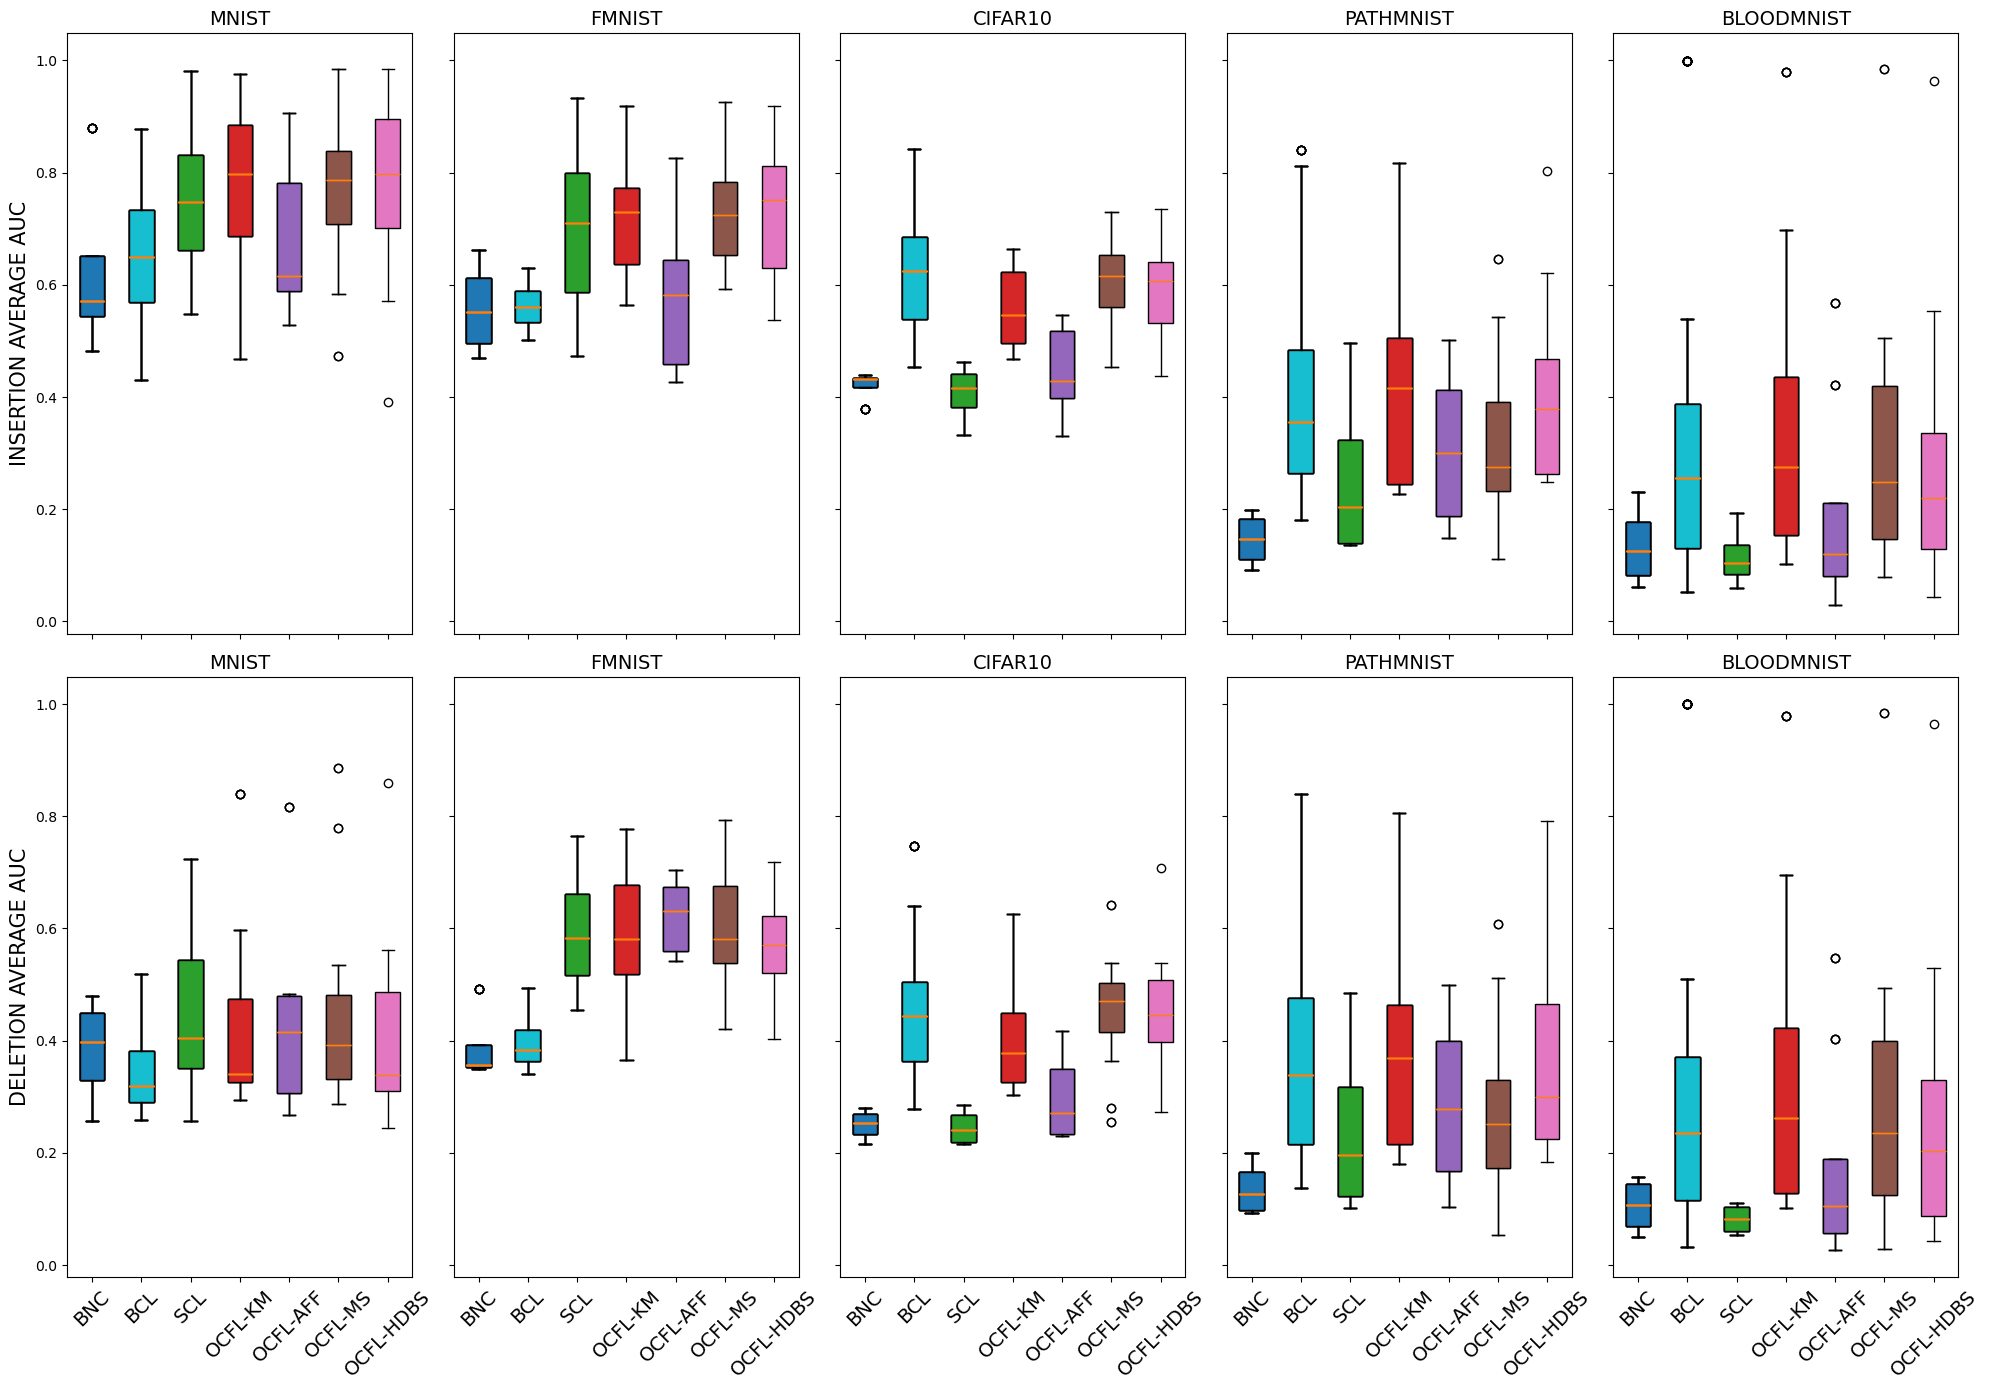

In [3]:
EXPERIMENTS = ['experiment1A']
for experiment in EXPERIMENTS:
    fig, axes = plt.subplots(2, 5, figsize=(20, 14), sharex=True, sharey=True)
    for row_pos, type in enumerate(TYPES):
        for col_pos, dataset in enumerate(DATASETS):
            data_dict = {
                'BNC': [],
                'BCL': [],
                'SCL': [],
                'OCFL-KM': [],
                'OCFL-AFF': [],
                'OCFL-MS': [],
                'OCFL-HDBS': []
            }
            for algo in ALGOS:
                for overlap in OVERLAPS:
                    data = pd.read_csv(os.path.join(os.path.join(EXPERIMENTS_ROOT, experiment, dataset, f'{dataset}_{overlap}_15_{algo}.csv')))[type]
                    data_dict[ALGO_NAME_MAPPING[algo]].extend(data)
                bp = axes[row_pos, col_pos].boxplot([data_dict['BNC'], data_dict['BCL'], data_dict['SCL'], data_dict['OCFL-KM'], data_dict['OCFL-AFF'], data_dict['OCFL-MS'], data_dict['OCFL-HDBS']], patch_artist=True)
                # Apply colors to each box
                for patch, color in zip(bp['boxes'], COLOR_MAPPING):
                    patch.set_facecolor(color)
                    patch.set_edgecolor('black')  # Optional: border color
                axes[row_pos, col_pos].set_title(dataset, fontsize=14)
                axes[row_pos, col_pos].set_xticks(range(1, 8))
                axes[row_pos, col_pos].set_xticklabels(['BNC', 'BCL', 'SCL', 'OCFL-KM', 'OCFL-AFF', 'OCFL-MS', 'OCFL-HDBS'], rotation=45, fontsize=14)
        axes[0, 0].set_ylabel('INSERTION AVERAGE AUC', fontsize=15)
        axes[1, 0].set_ylabel('DELETION AVERAGE AUC', fontsize=15)
        
        fig.tight_layout()

In [4]:
# EXPERIMENTS = ['experiment1B']
# for experiment in EXPERIMENTS:
#     fig, axes = plt.subplots(2, 5, figsize=(20, 14), sharex=True, sharey=True)
#     for row_pos, type in enumerate(TYPES):
#         for col_pos, dataset in enumerate(DATASETS):
#             data_dict = {
#                 'BNC': [],
#                 'BCL': [],
#                 'SCL': [],
#                 'OCFL-KM': [],
#                 'OCFL-AFF': [],
#                 'OCFL-MS': [],
#                 'OCFL-HDBS': []
#             }
#             for algo in ALGOS:
#                 for overlap in OVERLAPS:
#                     data = pd.read_csv(os.path.join(os.path.join(EXPERIMENTS_ROOT, experiment, dataset, f'{dataset}_{overlap}_15_{algo}.csv')))[type]
#                     data_dict[ALGO_NAME_MAPPING[algo]].extend(data)
#                 bp = axes[row_pos, col_pos].boxplot([data_dict['BNC'], data_dict['BCL'], data_dict['SCL'], data_dict['OCFL-KM'], data_dict['OCFL-AFF'], data_dict['OCFL-MS'], data_dict['OCFL-HDBS']], patch_artist=True)
#                 # Apply colors to each box
#                 for patch, color in zip(bp['boxes'], COLOR_MAPPING):
#                     patch.set_facecolor(color)
#                     patch.set_edgecolor('black')  # Optional: border color
#                 axes[row_pos, col_pos].set_title(dataset, fontsize=14)
#                 axes[row_pos, col_pos].set_xticks(range(1, 8))
#                 axes[row_pos, col_pos].set_xticklabels(['BNC', 'BCL', 'SCL', 'OCFL-KM', 'OCFL-AFF', 'OCFL-MS', 'OCFL-HDBS'], rotation=45, fontsize=14)
#         axes[0, 0].set_ylabel('INSERTION AVERAGE AUC', fontsize=15)
#         axes[1, 0].set_ylabel('DELETION AVERAGE AUC', fontsize=15)
        
#         fig.tight_layout()

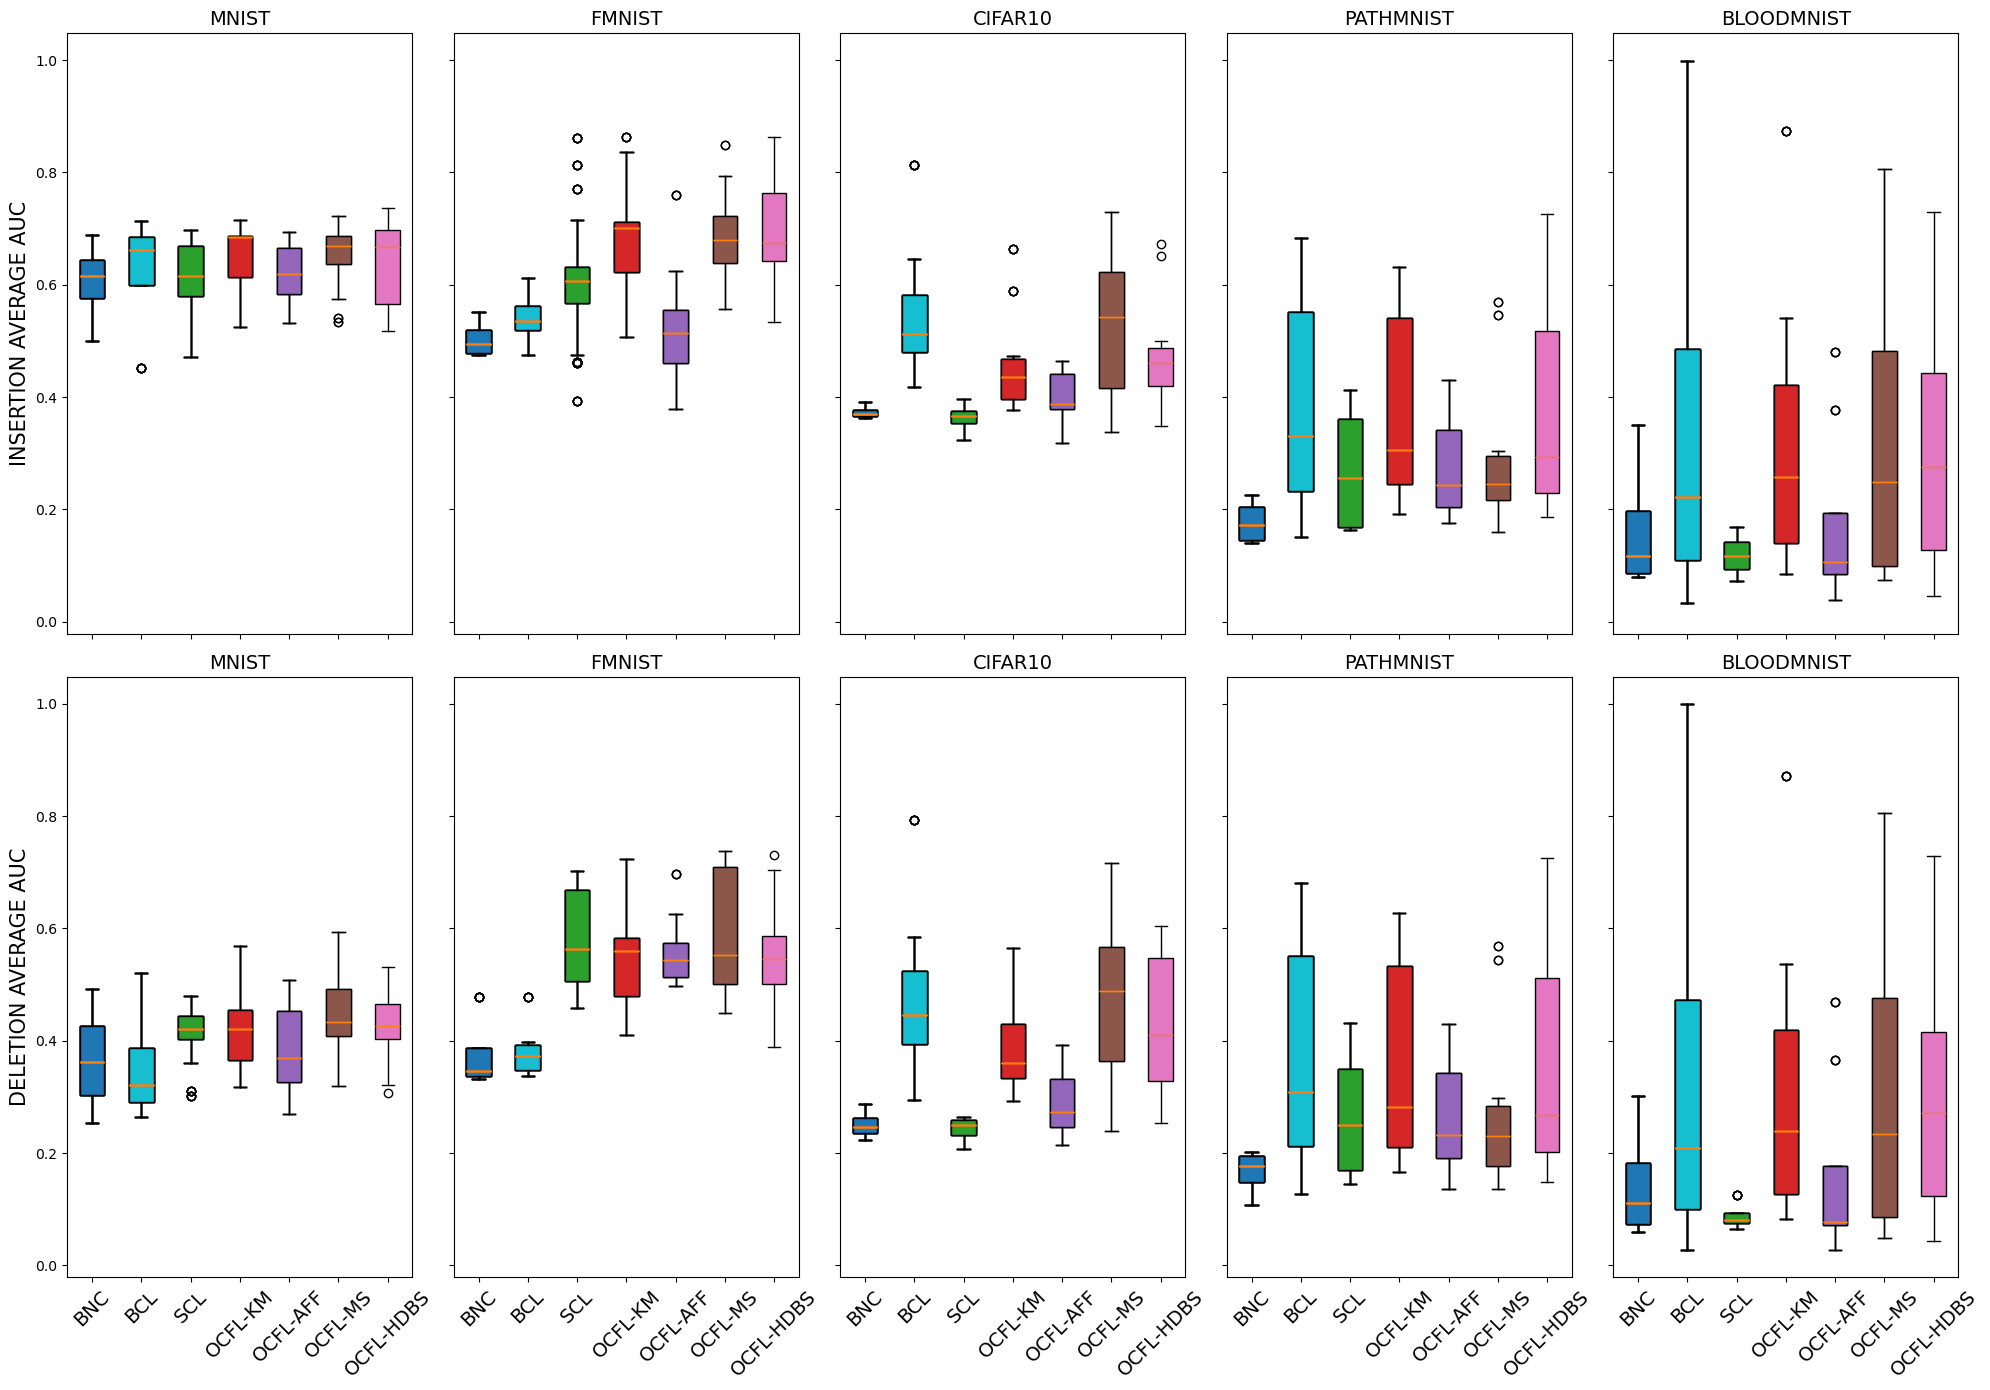

In [5]:
EXPERIMENTS = ['experiment1C']
for experiment in EXPERIMENTS:
    fig, axes = plt.subplots(2, 5, figsize=(20, 14), sharex=True, sharey=True)
    for row_pos, type in enumerate(TYPES):
        for col_pos, dataset in enumerate(DATASETS):
            data_dict = {
                'BNC': [],
                'BCL': [],
                'SCL': [],
                'OCFL-KM': [],
                'OCFL-AFF': [],
                'OCFL-MS': [],
                'OCFL-HDBS': []
            }
            for algo in ALGOS:
                for overlap in OVERLAPS:
                    data = pd.read_csv(os.path.join(os.path.join(EXPERIMENTS_ROOT, experiment, dataset, f'{dataset}_{overlap}_15_{algo}.csv')))[type]
                    data_dict[ALGO_NAME_MAPPING[algo]].extend(data)
                bp = axes[row_pos, col_pos].boxplot([data_dict['BNC'], data_dict['BCL'], data_dict['SCL'], data_dict['OCFL-KM'], data_dict['OCFL-AFF'], data_dict['OCFL-MS'], data_dict['OCFL-HDBS']], patch_artist=True)
                # Apply colors to each box
                for patch, color in zip(bp['boxes'], COLOR_MAPPING):
                    patch.set_facecolor(color)
                    patch.set_edgecolor('black')  # Optional: border color
                axes[row_pos, col_pos].set_title(dataset, fontsize=14)
                axes[row_pos, col_pos].set_xticks(range(1, 8))
                axes[row_pos, col_pos].set_xticklabels(['BNC', 'BCL', 'SCL', 'OCFL-KM', 'OCFL-AFF', 'OCFL-MS', 'OCFL-HDBS'], rotation=45, fontsize=14)
        axes[0, 0].set_ylabel('INSERTION AVERAGE AUC', fontsize=15)
        axes[1, 0].set_ylabel('DELETION AVERAGE AUC', fontsize=15)
        
        fig.tight_layout()

# Section I: Aggregated boxplots

## Insertion

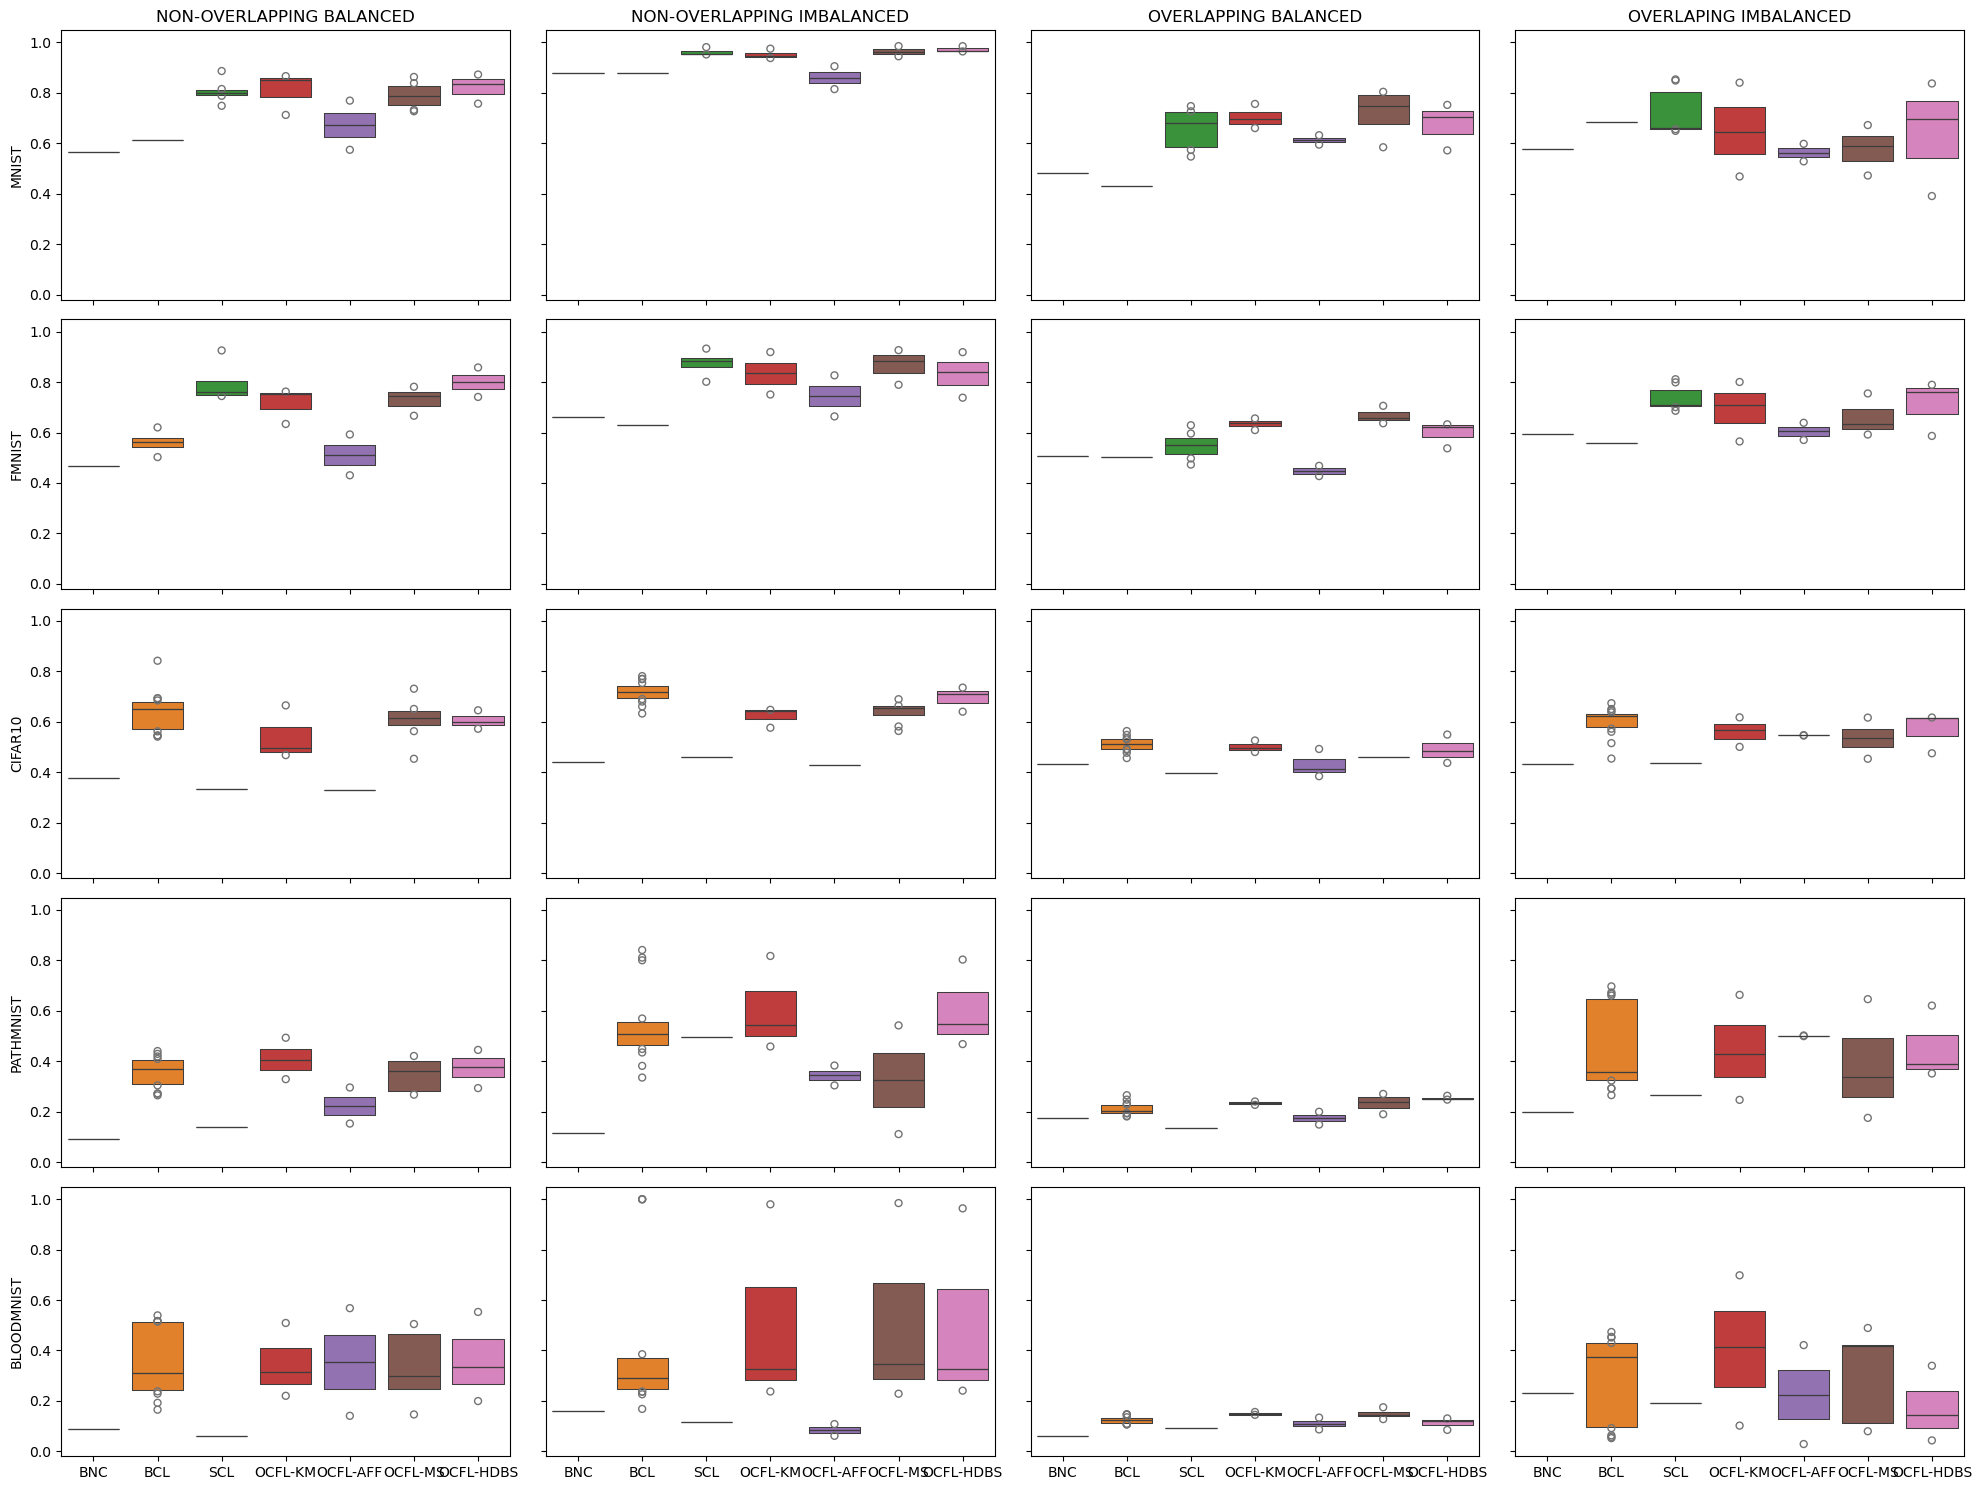

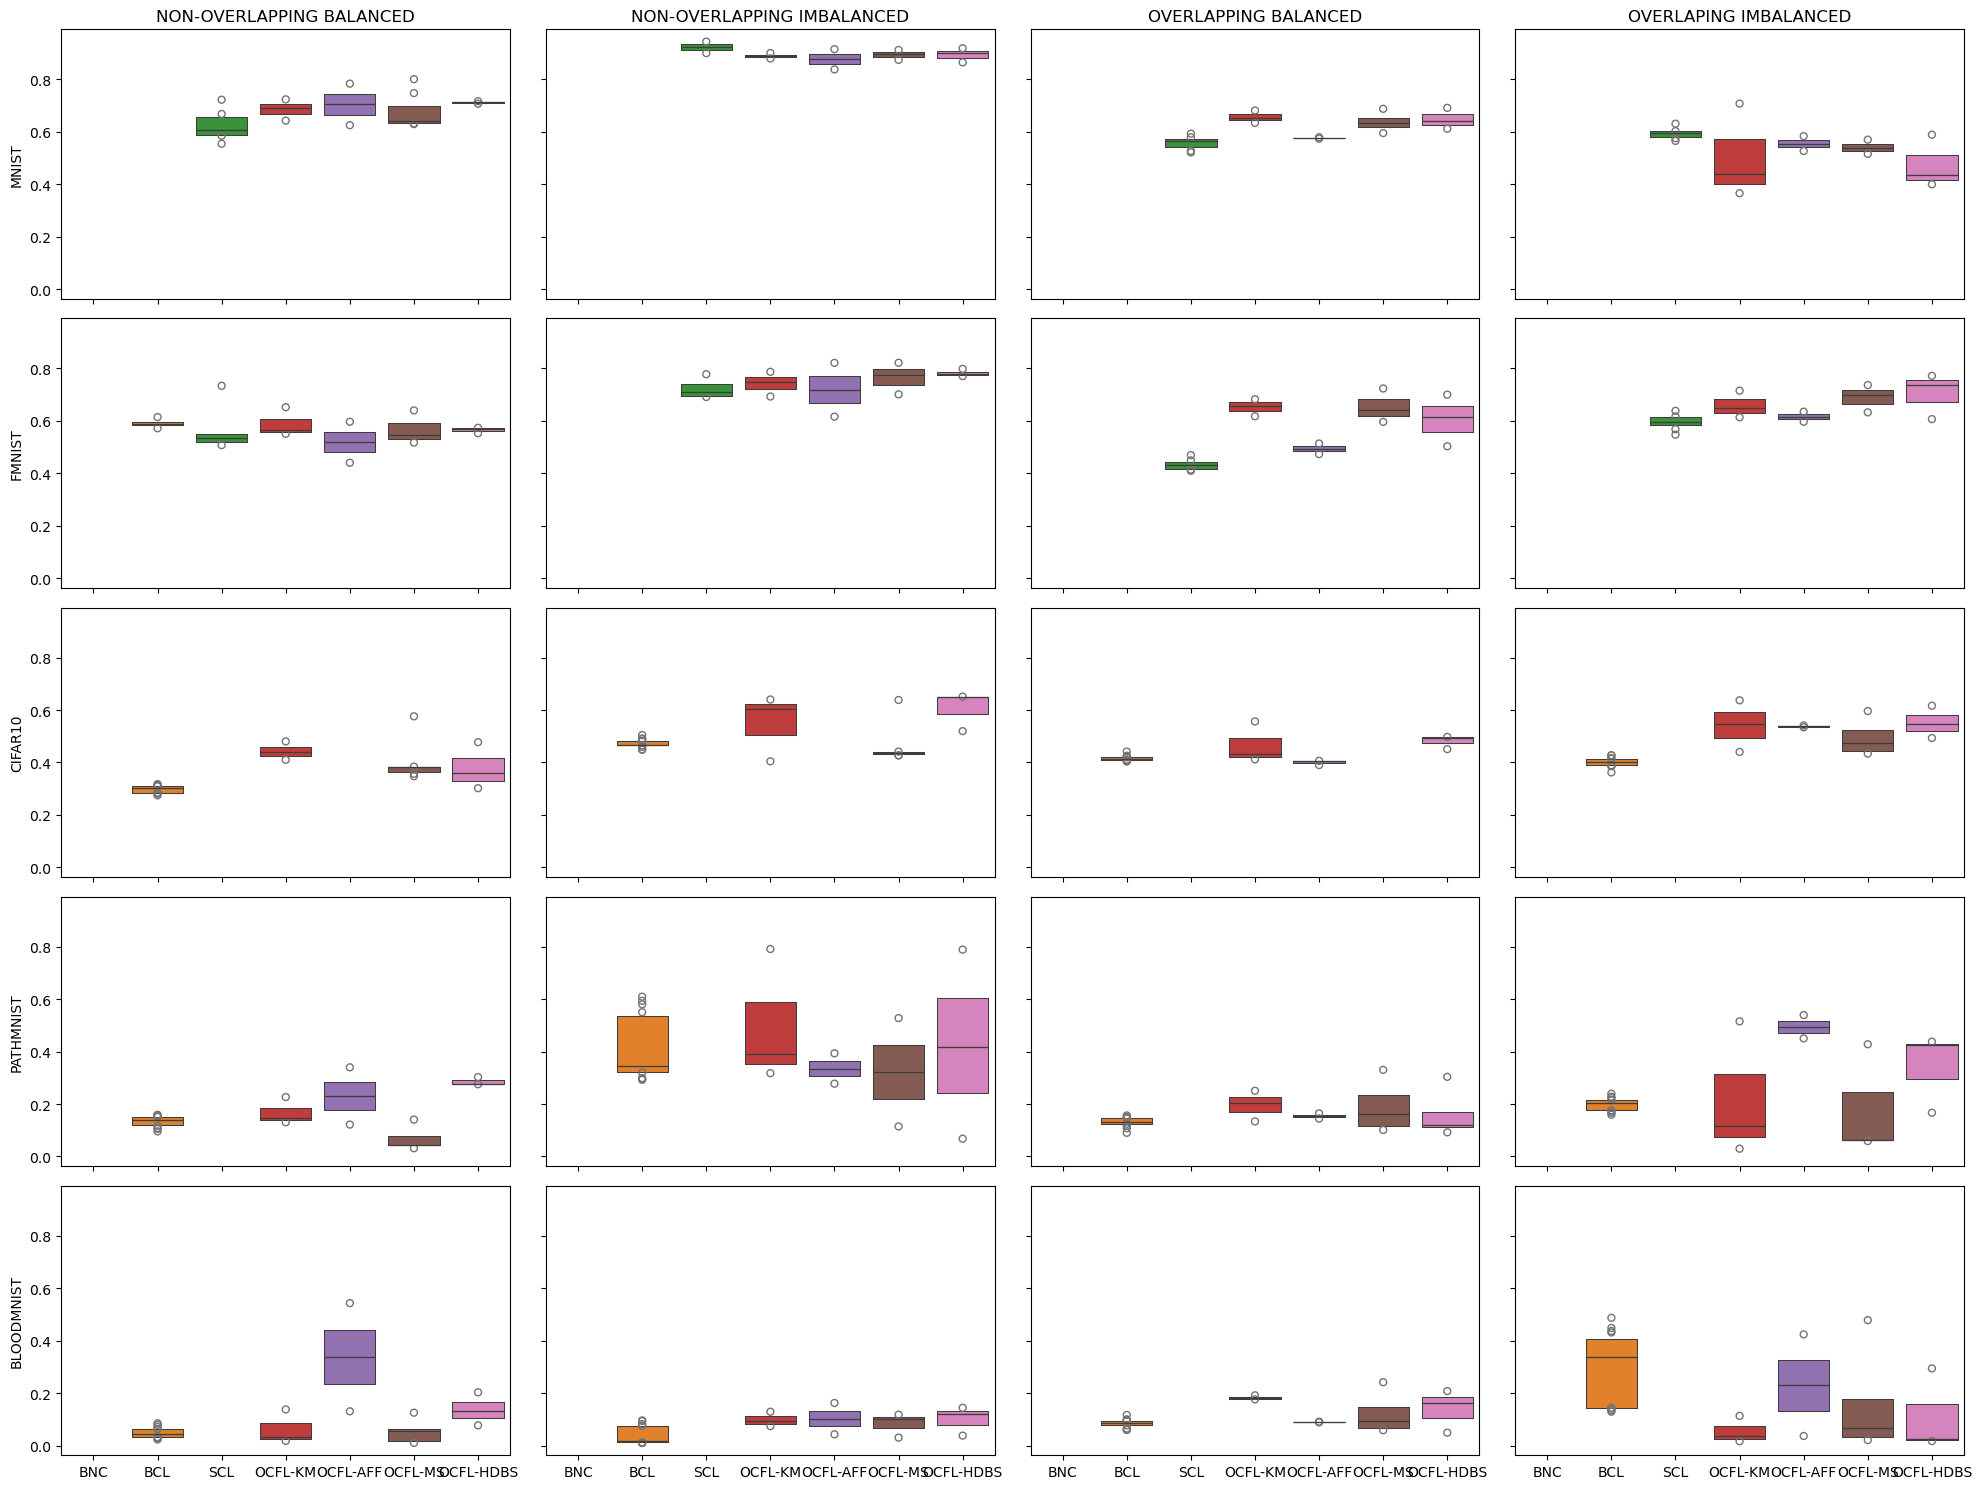

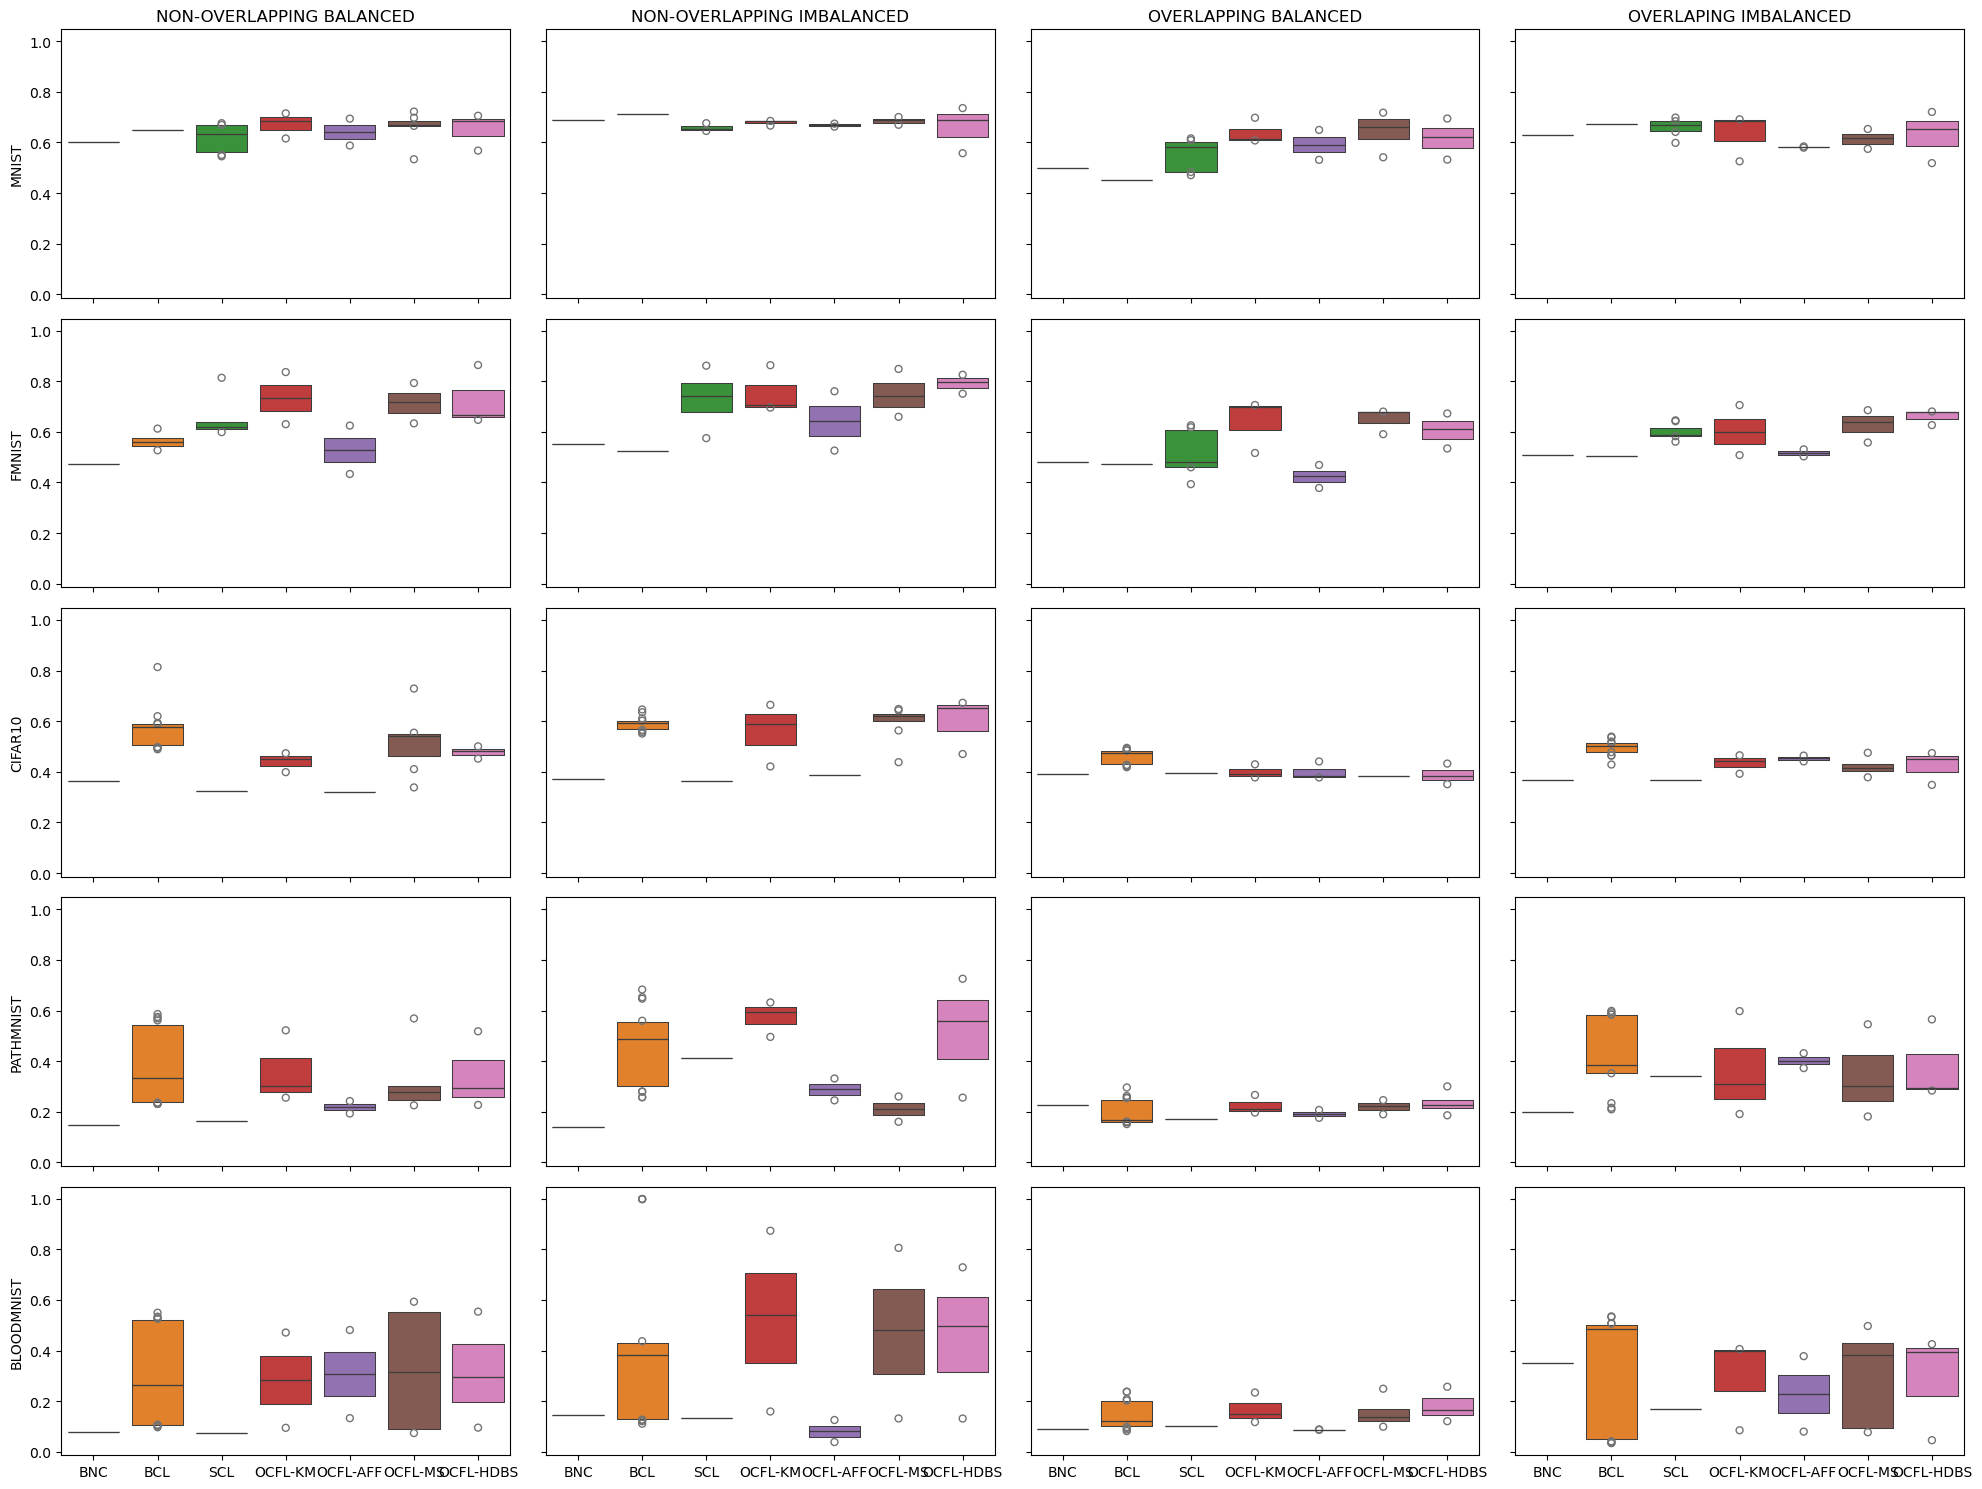

In [6]:
EXPERIMENTS = ['experiment1A', 'experiment1B', 'experiment1C']
for experiment in EXPERIMENTS:
    fig, axes = plt.subplots(5, 4, figsize=(20, 15), sharex=True, sharey=True)
    for row_pos, dataset in enumerate(DATASETS):
        for col_pos, overlap in enumerate(OVERLAPS):
            results_frame = pd.DataFrame(index=range(15))
            for algo in ALGOS:
                path = os.path.join(os.path.join(EXPERIMENTS_ROOT, experiment, dataset, f'{dataset}_{overlap}_15_{algo}.csv'))
                frame = pd.read_csv(path)
                results_frame[ALGO_NAME_MAPPING[algo]] = frame['ins_mean']
            sns.boxenplot(results_frame, ax=axes[row_pos, col_pos])
            if row_pos == 0:
                axes[row_pos, col_pos].set_title(SPLIT_NAME_MAPPING[overlap])
            if col_pos == 0:
                axes[row_pos, col_pos].set_ylabel(dataset)        
    fig.tight_layout()
    fig.savefig(os.path.join(EXPERIMENTS_ROOT, experiment, f'Insertion_Boxplot_{experiment}.png'), dpi=300)

## Deletion
Experiment A (In-Distribution), Experiment B (Out of Distribution), Experiment C (Orchestrator Distribution)

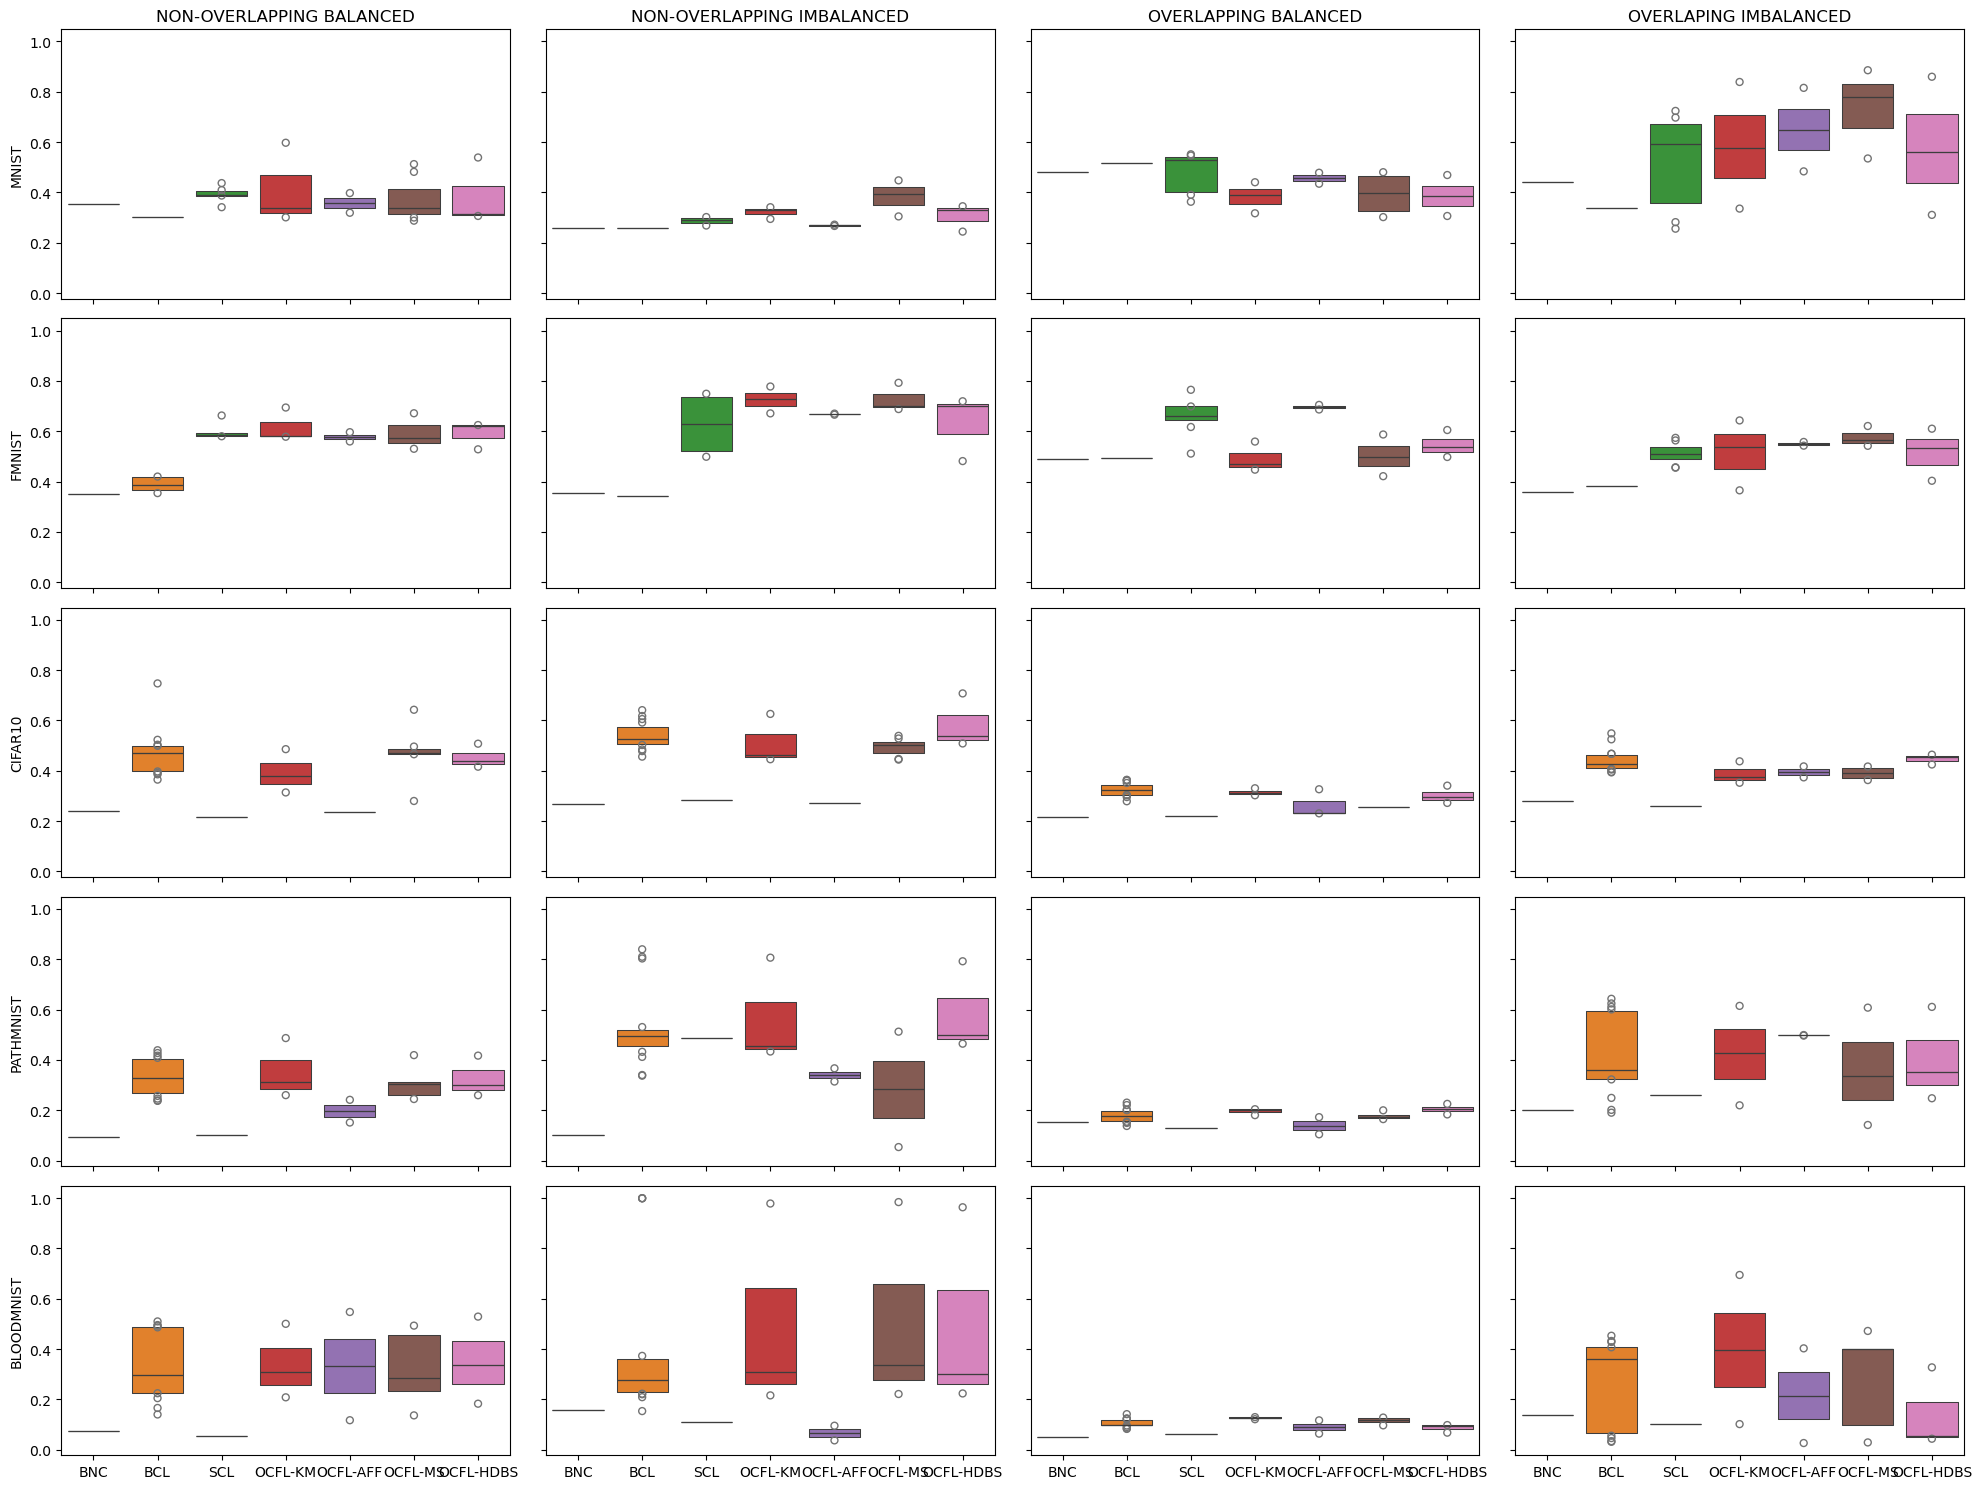

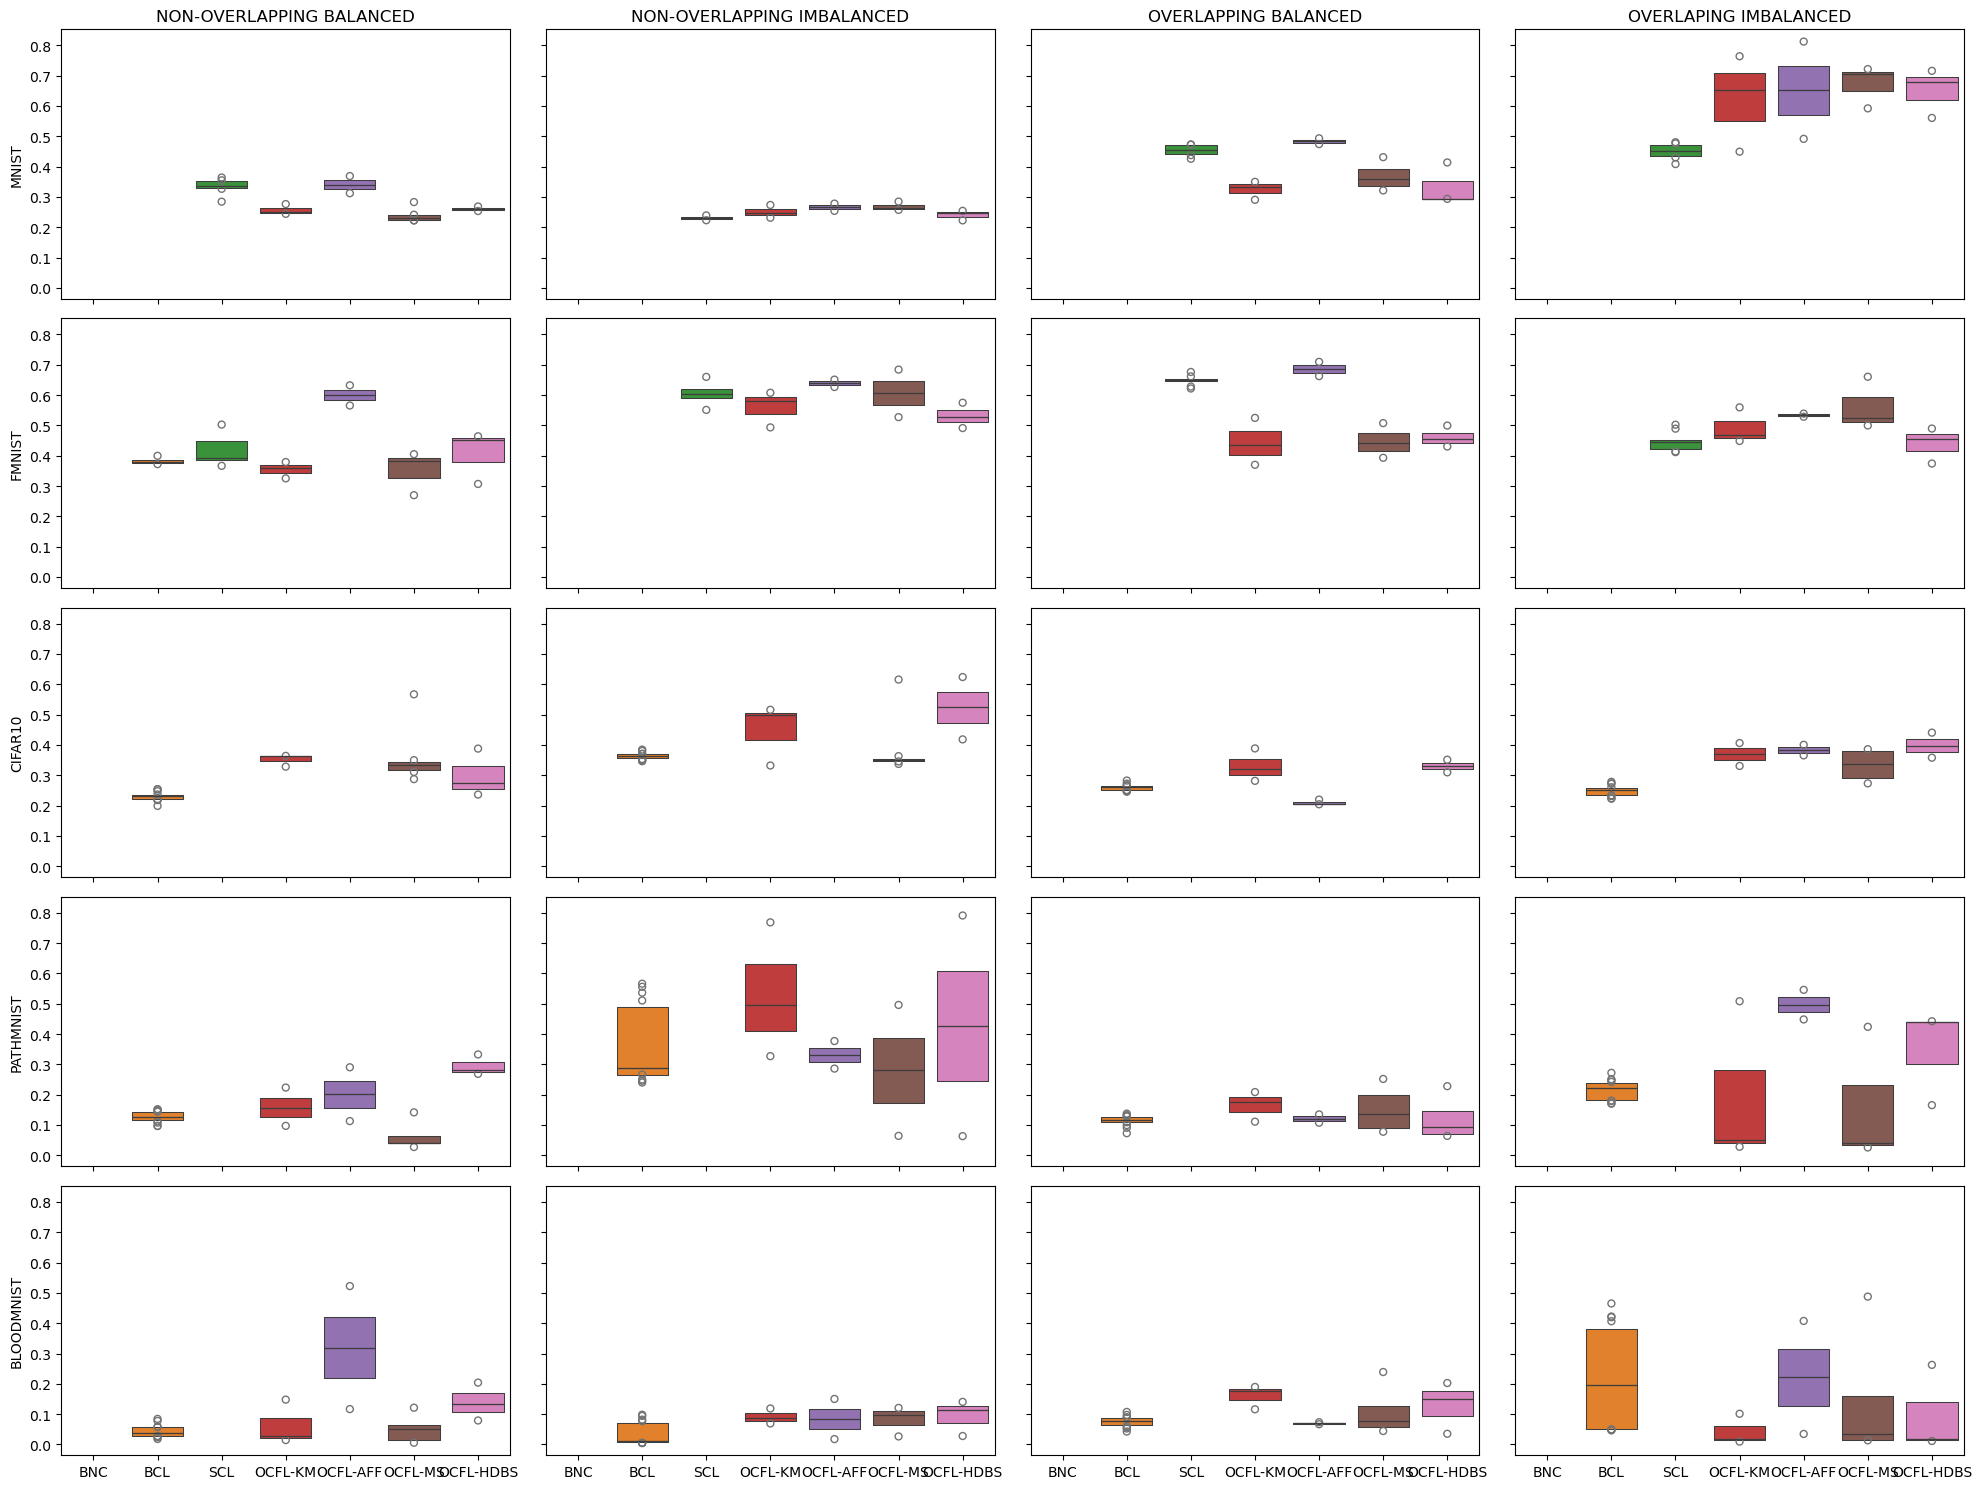

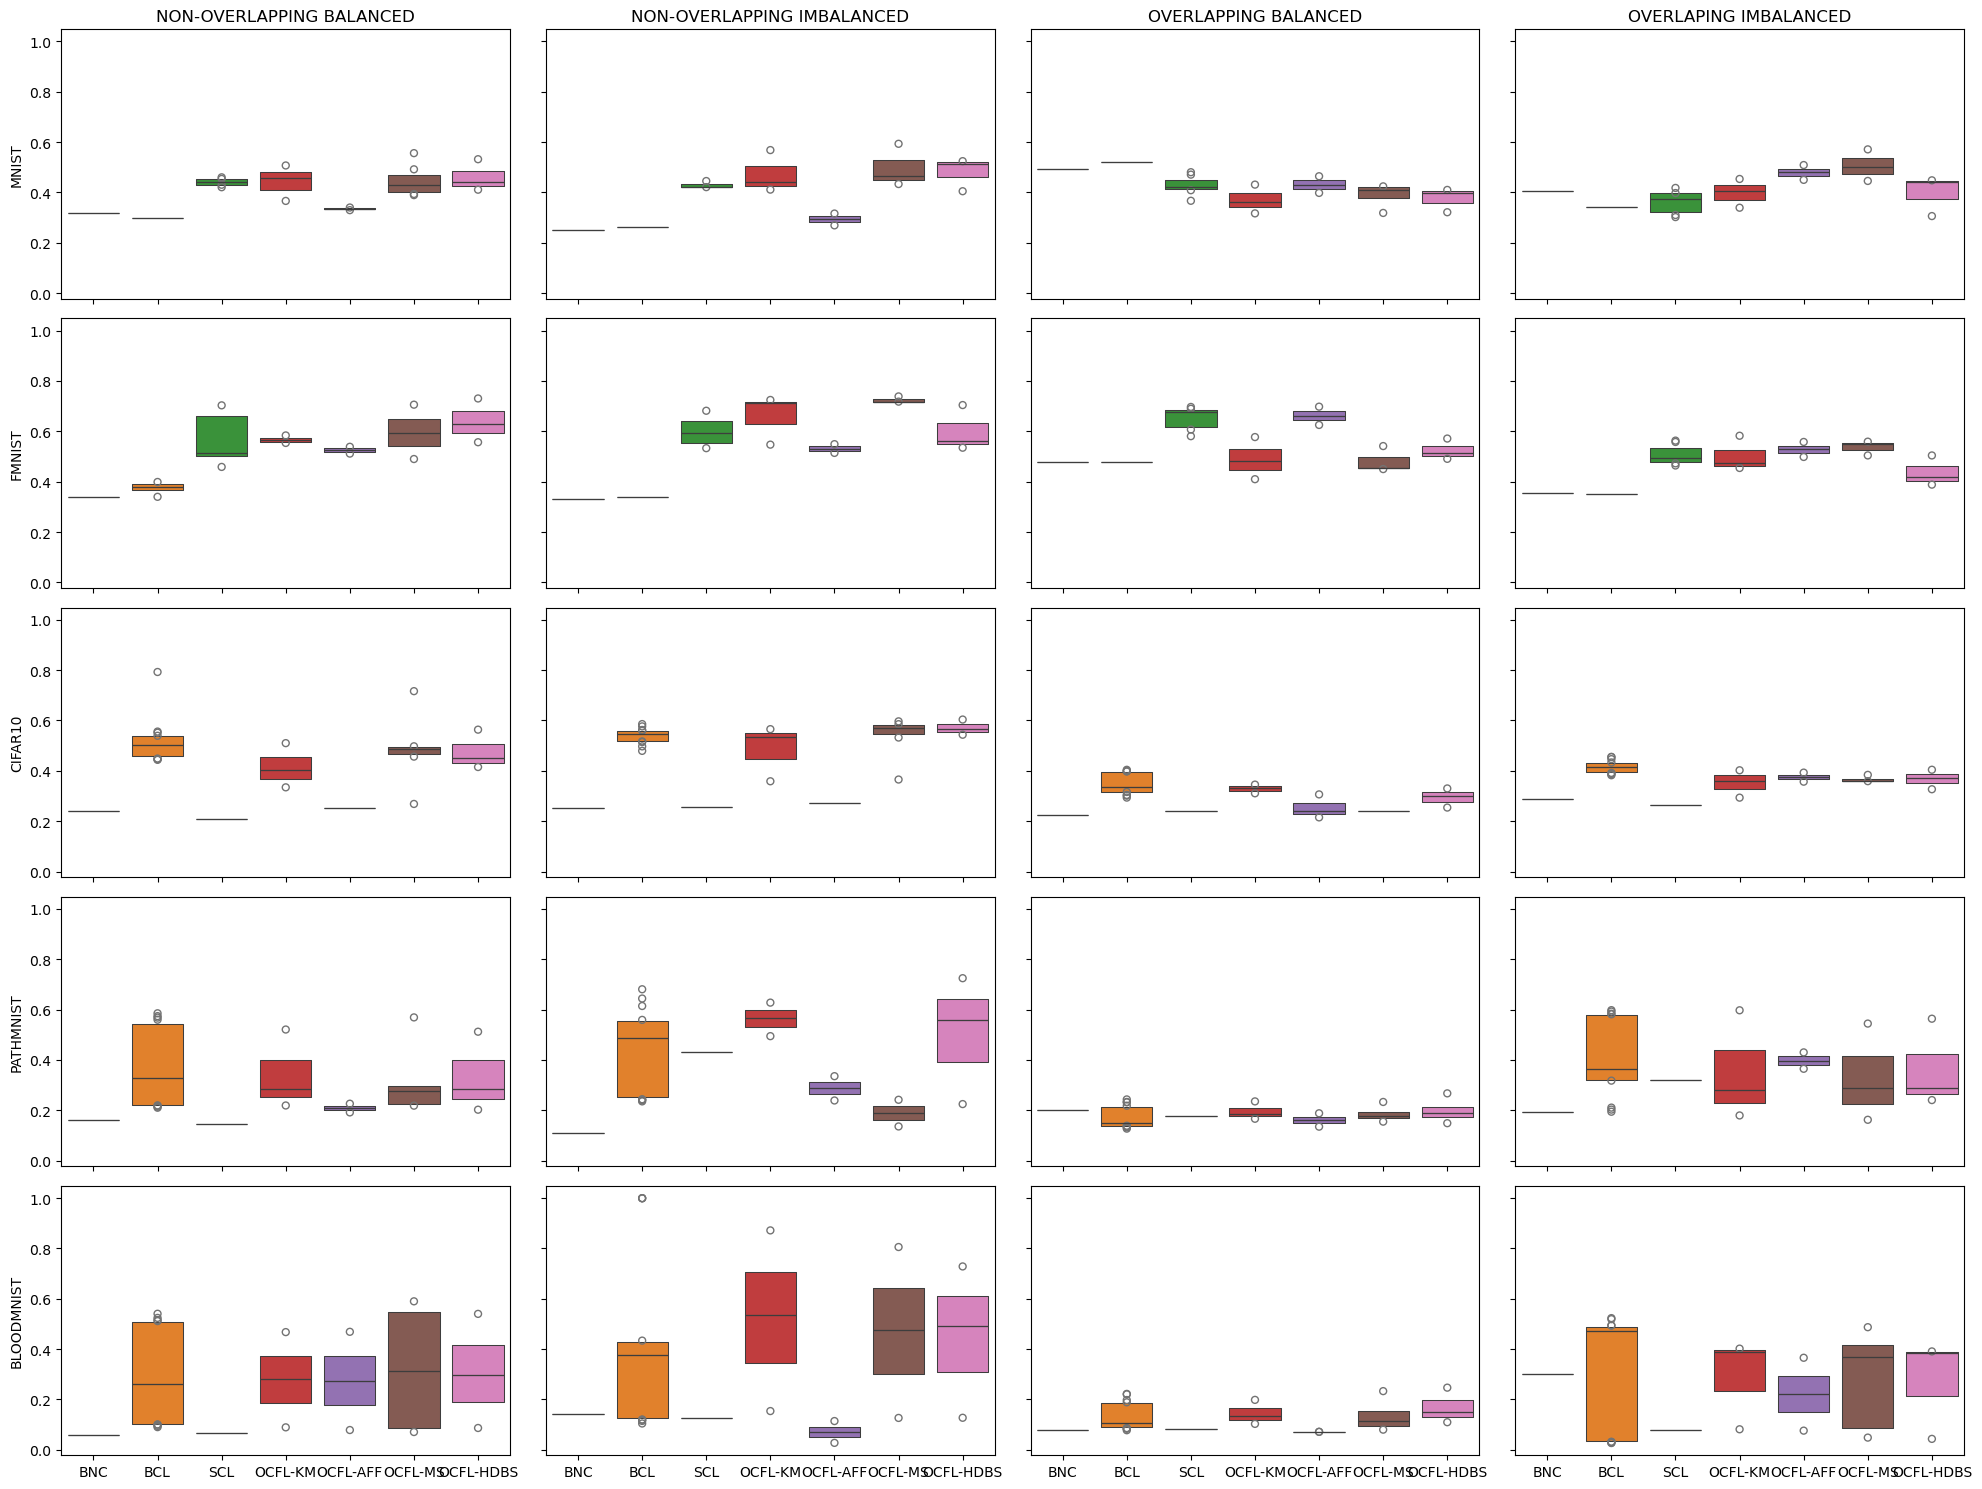

In [7]:
EXPERIMENTS = ['experiment1A', 'experiment1B', 'experiment1C']
for experiment in EXPERIMENTS:
    fig, axes = plt.subplots(5, 4, figsize=(20, 15), sharex=True, sharey=True)
    for row_pos, dataset in enumerate(DATASETS):
        for col_pos, overlap in enumerate(OVERLAPS):
            results_frame = pd.DataFrame(index=range(15))
            for algo in ALGOS:
                path = os.path.join(os.path.join(EXPERIMENTS_ROOT, experiment, dataset, f'{dataset}_{overlap}_15_{algo}.csv'))
                frame = pd.read_csv(path)
                results_frame[ALGO_NAME_MAPPING[algo]] = frame['del_mean']
            sns.boxenplot(results_frame, ax=axes[row_pos, col_pos])
            if row_pos == 0:
                axes[row_pos, col_pos].set_title(SPLIT_NAME_MAPPING[overlap])
            if col_pos == 0:
                axes[row_pos, col_pos].set_ylabel(dataset)
            
    fig.tight_layout()
    fig.savefig(os.path.join(EXPERIMENTS_ROOT, experiment, f'Deletion_Boxplot_{experiment}.png'), dpi=300)